In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.cm as cm
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

Greyscale Coins.tif
Shape: (505, 394)
Data type: uint8


Text(0.5, 1.0, 'Greyscale Coins.tif')

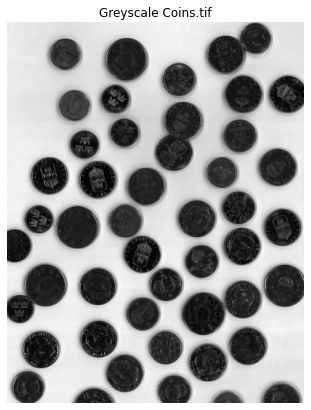

In [13]:
im = cv.imread('./data/coins.tif')
im = cv.cvtColor(src=im, code=cv.COLOR_RGB2GRAY)
print('Greyscale Coins.tif')
print(f'Shape: {im.shape}')
print(f'Data type: {im.dtype}')
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
ax0.imshow(im, cmap=cm.gray)
ax0.axis('off')
ax0.set_title('Greyscale Coins.tif')

Number of coins detected: 47


/usr/local/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Text(0.5, 1.0, 'Local maxima')

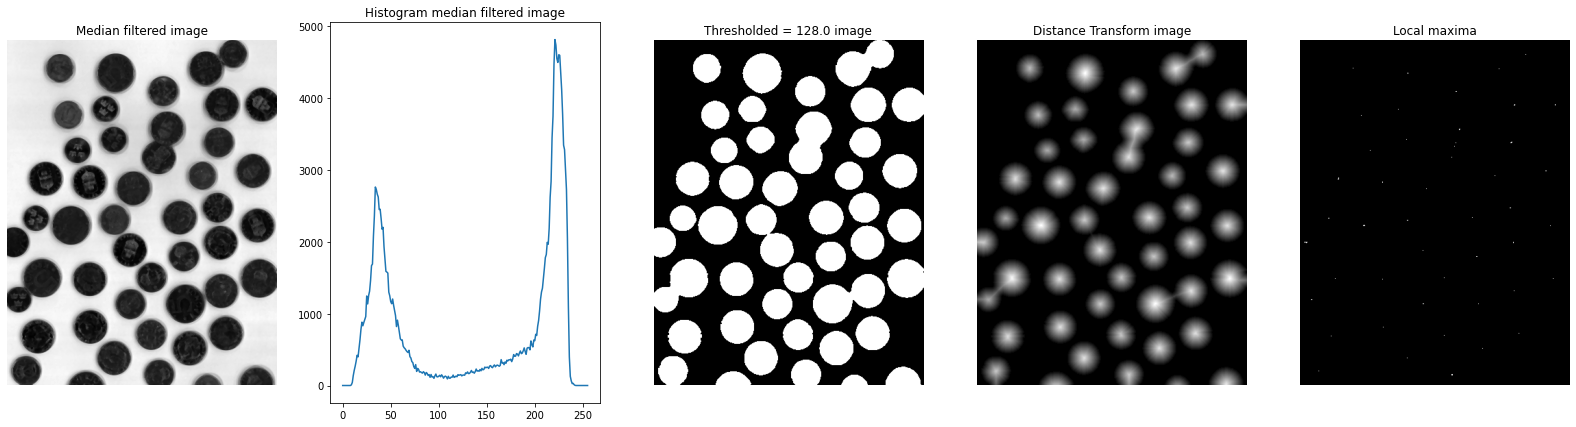

In [133]:
im_median = cv.medianBlur(src=im, ksize=3)
hist = cv.calcHist(images=[im_median], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
thres_value, im_binary = cv.threshold(src=im_median, thresh=0, maxval=255, type=cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
# im_close = cv.morphologyEx(src=im_binary, op=cv.MORPH_CLOSE, kernel=cv.getStructuringElement(shape=cv.MORPH_ELLIPSE, ksize=(3,3)), anchor=(-1,-1), iterations=1, borderType=cv.BORDER_REFLECT_101)
# im_close = cv.medianBlur(src=im_close, ksize=5)
distanceT = cv.distanceTransform(src=im_binary, distanceType=cv.DIST_L2, maskSize=cv.DIST_MASK_3)
local_max = peak_local_max(distanceT, indices=False, min_distance=2, labels=im_binary)
markers, num_features = ndimage.label(local_max, structure=np.ones(shape=(3,3), dtype=np.uint8))
print(f'Number of coins detected: {num_features}')
labels = watershed(-distanceT, markers=markers, mask=im_binary)
im_open = cv.morphologyEx(src=labels.astype(np.uint8), op=cv.MORPH_OPEN, kernel=cv.getStructuringElement(shape=cv.MORPH_RECT, ksize=(7,7)), anchor=(-1,-1), iterations=1, borderType=cv.BORDER_REFLECT_101)

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=5, figsize=(28,7))
ax0.imshow(im_median, cmap=cm.gray)
ax0.axis('off')
ax0.set_title('Median filtered image')
ax1.plot(hist)
ax1.set_title('Histogram median filtered image')
ax2.imshow(im_binary, cmap=cm.gray)
ax2.set_title(f'Thresholded = {thres_value} image')
ax2.axis('off')
ax3.imshow(distanceT, cmap=cm.gray)
ax3.axis('off')
ax3.set_title('Distance Transform image')
ax4.imshow(local_max, cmap=cm.gray)
ax4.axis('off')
ax4.set_title('Local maxima')

Text(0.5, 1.0, 'Opened segmented image')

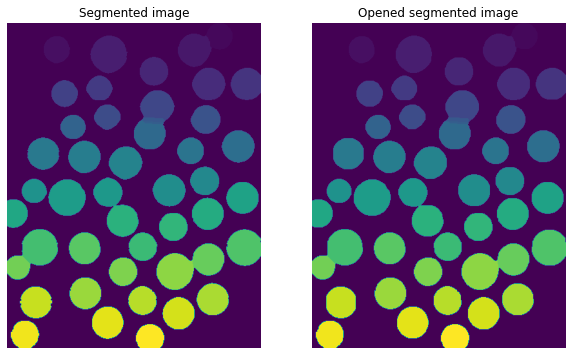

In [135]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
ax0.imshow(labels)
ax0.axis('off')
ax0.set_title('Segmented image')

ax1.imshow(im_open)
ax1.axis('off')
ax1.set_title('Opened segmented image')

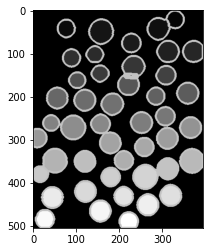

In [137]:
for label in np.unique(labels):
    if label == 0:
        continue

    # Create a mask
    mask = np.zeros(im.shape, dtype="uint8")
    mask[labels == label] = 255

    # Find contours and determine contour area
    cnts = cv.findContours(mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    c = max(cnts, key=cv.contourArea)
    area = cv.contourArea(c)
    cv.drawContours(im_open, [c], -1, (36,255,12), 4)

